# Benchmarks notebook

## ProDOT

Ioan Previous work: [Ioan2021](https://pubs.acs.org/doi/abs/10.1021/acs.macromol.0c02132)

Test trajectory `ProDOT-2Hex-00PC-cryst.xyz` with a total of `5000` frames and `4177` atoms.

# QUIPPY - ASE

In [1]:
import numpy as np
import time
import sys
from tqdm import tqdm
from ase.io import read, write
from quippy import descriptors
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../../')

In [3]:
from src import myTools, plotTools

## ASE - traj reader

In [4]:
def timed_traj_reader(sys_traj, chunk, single_frame=False, verbose=True):
    t0 = time.time()
    if single_frame:
        traj_ = read(sys_traj, index=str(chunk-1)+':'+str(chunk))
    else:
        traj_ = read(sys_traj, index='0:'+str(chunk))
    t1 = time.time()
    T = np.around((t1-t0),2)
    if verbose:
        print(f'time={T}s')
    return traj_ , T

In [5]:
traj_chunk = [1,2,5,10,20,100,500,1000]
Ntot_frames = 68001

In [6]:
sysdir_path = '/home/agardin/workPHD/1.cambridge/MLanalysis/proDOT/0.data/'
sysname = 'ProDOT-2Hex-00PC-cryst.xyz'

### Reading a single frame

In [7]:
frame1, _ = timed_traj_reader(sys_traj=sysdir_path+sysname, 
                              chunk=1, single_frame=True)

time=0.02s


In [9]:
frame1[0].info

{'Time': 1.0, 'Traj': 1, 'SEC_label': 1.0}

In [8]:
read(sysdir_path+sysname,index=':1')[0].info

{'Time': 1.0, 'Traj': 1, 'SEC_label': 1.0}

In [10]:
comp_time_sfr = list()
frame_list = list()
for frames in traj_chunk:
    f, t = timed_traj_reader(sys_traj=sysdir_path+sysname,
                             chunk=frames, single_frame=True)
    comp_time_sfr.append(t)
    frame_list.append(f[0])

time=0.06s
time=0.01s
time=0.01s
time=0.01s
time=0.01s
time=0.04s
time=0.21s
time=0.33s


In [11]:
[f.info for f in frame_list]

[{'Time': 1.0, 'Traj': 1, 'SEC_label': 1.0},
 {'Time': 2.0, 'Traj': 1, 'SEC_label': 1.0},
 {'Time': 5.0, 'Traj': 1, 'SEC_label': 1.0},
 {'Time': 10.0, 'Traj': 1, 'SEC_label': 1.0},
 {'Time': 20.0, 'Traj': 1, 'SEC_label': 1.0},
 {'Time': 50.0, 'Traj': 2, 'SEC_label': 1.0},
 {'Time': 50.0, 'Traj': 10, 'SEC_label': 3.0},
 {'Time': 50.0, 'Traj': 20, 'SEC_label': 3.0}]

### Reading chuncks of frames

In [12]:
comp_time_chunk = list()
bundle_list = list()
for frames in traj_chunk:
    f, t = timed_traj_reader(sys_traj=sysdir_path+sysname,
                             chunk=frames, single_frame=False)
    print(frames, len(f))
    comp_time_chunk.append(t)
    bundle_list.append(f[0])

time=0.01s
1 1
time=0.02s
2 2
time=0.04s
5 5
time=0.07s
10 10
time=0.15s
20 20
time=0.7s
100 100
time=3.53s
500 500
time=6.83s
1000 1000


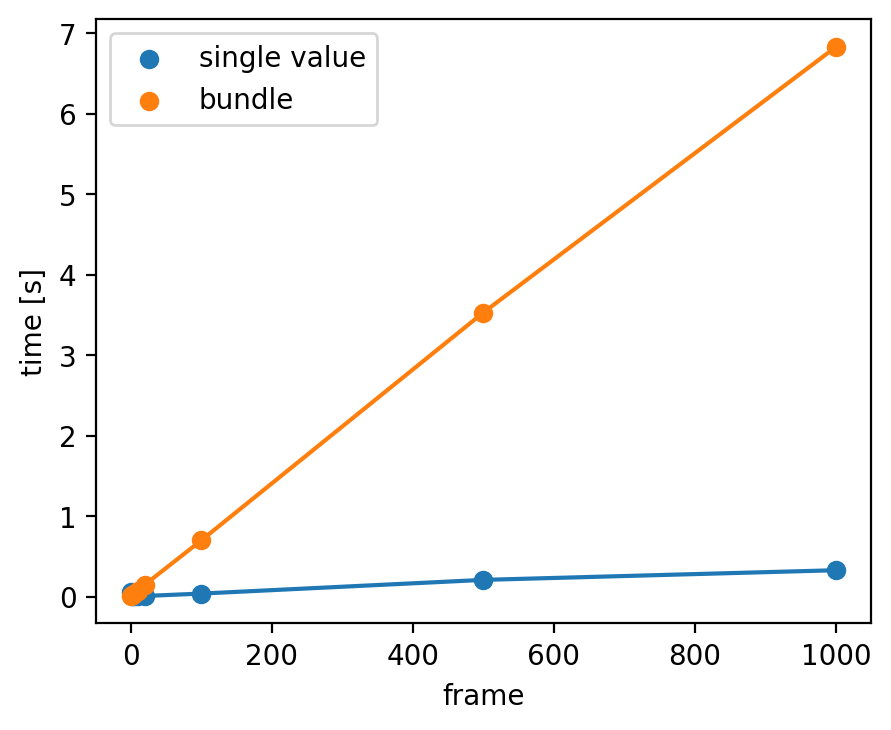

In [13]:
fig, ax = plotTools.get_axes(1)
ax.plot(traj_chunk,comp_time_sfr)
ax.scatter(traj_chunk,comp_time_sfr, label='single value', zorder=3)
ax.plot(traj_chunk,comp_time_chunk)
ax.scatter(traj_chunk,comp_time_chunk, label='bundle', zorder=3)
ax.set_xlabel('frame')
ax.set_ylabel('time [s]')
ax.legend()

In [14]:
bundle_list[0].info

{'Time': 1.0, 'Traj': 1, 'SEC_label': 1.0}